### ML: Regression

Predict: burned area of forest fires

<br>

#### Import packages

In [22]:
import pandas as pd
%matplotlib inline
import seaborn as sn
import matplotlib.pyplot as plt
import numpy as np
from functools import reduce
from sklearn.preprocessing import OneHotEncoder
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

<br>

#### Data dictionary

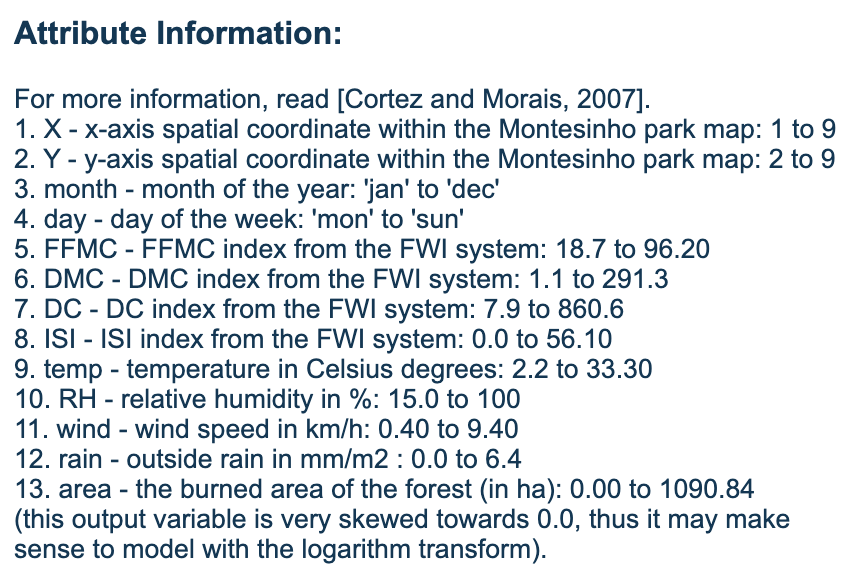

In [23]:
from IPython.display import Image
Image(filename='data/forestfires_datanotes.png') 

<br>

#### Load dataset

In [24]:
df = pd.read_csv("data/forestfires.csv")
df.head(10)

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0
5,8,6,aug,sun,92.3,85.3,488.0,14.7,22.2,29,5.4,0.0,0.0
6,8,6,aug,mon,92.3,88.9,495.6,8.5,24.1,27,3.1,0.0,0.0
7,8,6,aug,mon,91.5,145.4,608.2,10.7,8.0,86,2.2,0.0,0.0
8,8,6,sep,tue,91.0,129.5,692.6,7.0,13.1,63,5.4,0.0,0.0
9,7,5,sep,sat,92.5,88.0,698.6,7.1,22.8,40,4.0,0.0,0.0


<br>

#### Check prediction

In [25]:
df["area"].unique()

array([0.00000e+00, 3.60000e-01, 4.30000e-01, 4.70000e-01, 5.50000e-01,
       6.10000e-01, 7.10000e-01, 7.70000e-01, 9.00000e-01, 9.50000e-01,
       9.60000e-01, 1.07000e+00, 1.12000e+00, 1.19000e+00, 1.36000e+00,
       1.43000e+00, 1.46000e+00, 1.56000e+00, 1.61000e+00, 1.63000e+00,
       1.64000e+00, 1.69000e+00, 1.75000e+00, 1.90000e+00, 1.94000e+00,
       1.95000e+00, 2.01000e+00, 2.14000e+00, 2.29000e+00, 2.51000e+00,
       2.53000e+00, 2.55000e+00, 2.57000e+00, 2.69000e+00, 2.74000e+00,
       3.07000e+00, 3.50000e+00, 4.53000e+00, 4.61000e+00, 4.69000e+00,
       4.88000e+00, 5.23000e+00, 5.33000e+00, 5.44000e+00, 6.38000e+00,
       6.83000e+00, 6.96000e+00, 7.04000e+00, 7.19000e+00, 7.30000e+00,
       7.40000e+00, 8.24000e+00, 8.31000e+00, 8.68000e+00, 8.71000e+00,
       9.41000e+00, 1.00100e+01, 1.00200e+01, 1.09300e+01, 1.10600e+01,
       1.12400e+01, 1.13200e+01, 1.15300e+01, 1.21000e+01, 1.30500e+01,
       1.37000e+01, 1.39900e+01, 1.45700e+01, 1.54500e+01, 1.720

<br>

#### Check missing values

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB


<br>

#### Create additional columns

In [27]:
# day
df.loc[df['day'].isin(['fri', 'tue', 'mon', 'wed', 'thu']), 'weekday'] = 1
df.loc[df['day'].isin(['sat', 'sun']), 'weekday'] = 0
df.loc[df['day'].isin(['fri', 'tue', 'mon', 'wed', 'thu']), 'weekend'] = 0
df.loc[df['day'].isin(['sat', 'sun']), 'weekend'] = 1

# month
df.loc[df['month'].isin(['mar', 'apr', 'may']), 'spring'] = 1
df.loc[~df['month'].isin(['mar', 'apr', 'may']), 'spring'] = 0
df.loc[df['month'].isin(['jun', 'jul', 'aug']), 'summer'] = 1
df.loc[~df['month'].isin(['jun', 'jul', 'aug']), 'summer'] = 0
df.loc[df['month'].isin(['sep', 'oct', 'nov']), 'autumn'] = 1
df.loc[~df['month'].isin(['sep', 'oct', 'nov']), 'autumn'] = 0
df.loc[df['month'].isin(['dec', 'jan', 'feb']), 'winter'] = 1
df.loc[~df['month'].isin(['dec', 'jan', 'feb']), 'winter'] = 0

<br>

#### Encode categorical features

In [32]:
encoder = OneHotEncoder()
data_onehotencoded_list = [df]
for column in ["month", "day"]:
    df_encoded_array = encoder.fit_transform(df[[column]].to_numpy()).toarray()
    df_encoded = pd.DataFrame(df_encoded_array, columns = [column+"_"+x.split("_")[-1] for x in encoder.get_feature_names()])
    data_onehotencoded_list.append(df_encoded)
df_onehotencoded_ = reduce(lambda left, right: pd.merge(left,right,left_index=True, right_index=True, how='outer'), data_onehotencoded_list)

In [33]:
df_onehotencoded_nonull = df_onehotencoded_

In [34]:
df_onehotencoded_nonull.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,weekday,weekend,spring,summer,autumn,winter,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_fri,day_mon,day_sat,day_sun,day_thu,day_tue,day_wed
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [36]:
target_label = ["area"]
categorical_features = ["month" ,"day"]
not_features = target_label+categorical_features
feature_names = [f_n for f_n in df_onehotencoded_nonull.columns.tolist() if f_n not in not_features]

X_train = df_onehotencoded_nonull[feature_names].to_numpy()
y_train = df_onehotencoded_nonull[target_label].to_numpy()

from sklearn.feature_selection import f_regression
f_value = f_regression(X_train, y_train)
f_value_sorted = sorted([f for f in zip(feature_names, f_value[0])], key=lambda x: x[1])
f_value_sorted.reverse()
for feature in f_value_sorted:
    print(feature)

('temp', 4.977993377852933)
('day_sat', 4.00710260533975)
('RH', 2.9539188728617187)
('DMC', 2.7587049935675716)
('X', 2.077460125726893)
('month_sep', 1.6535489004801371)
('day_fri', 1.4458045624066618)
('weekend', 1.3679824466505377)
('weekday', 1.367982446650537)
('DC', 1.2590023473026062)
('autumn', 1.2248773634678989)
('month_mar', 1.072921209394176)
('Y', 1.0390995989882483)
('spring', 1.0060616647451428)
('FFMC', 0.8303709476910067)
('day_mon', 0.23169410447103533)
('month_feb', 0.2214449989239091)
('day_sun', 0.2157457982761469)
('month_jun', 0.21261046012044935)
('day_thu', 0.20859489693884747)
('winter', 0.19740793826030506)
('month_oct', 0.14674635015903223)
('month_jan', 0.08163692861970404)
('wind', 0.0781452404547807)
('day_wed', 0.06754767421110539)
('month_nov', 0.040736123790963745)
('summer', 0.0357530764339434)
('month_apr', 0.03531284670792743)
('ISI', 0.03511994017676656)
('rain', 0.02794230940630441)
('month_may', 0.02021070173651504)
('month_jul', 0.0194738339404

/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [38]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(df_onehotencoded_, test_size=0.3, random_state=42)

In [39]:
X_train = train_set[feature_names].to_numpy()
y_train = train_set[target_label].to_numpy()

In [42]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()

scores = cross_val_score(tree_reg, X_train, y_train, scoring="neg_mean_squared_error", cv=5)
rmse_scores = np.sqrt(-scores)

def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())
    
display_scores(rmse_scores)

Scores: [105.64622639  45.13194214  96.09457994 107.61656456  31.10594693]
Mean: 77.11905199463813
Standard deviation: 32.38626142943953


In [43]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression 
lin_reg = LinearRegression()

scores = cross_val_score(lin_reg, X_train, y_train, scoring="neg_mean_squared_error", cv=5)
rmse_scores = np.sqrt(-scores)

def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())
    
display_scores(rmse_scores)

Scores: [44.16002226 26.24708274 31.03159142 90.86090723 27.8186894 ]
Mean: 44.02365860790879
Standard deviation: 24.253444867487893


linear regression better than decision tree regression